In [4]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)

2025-07-01 21:10:43.978266: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 21:10:43.986698: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 21:10:44.011544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751415044.060207   10471 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751415044.074655   10471 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751415044.111189   10471 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step
(60000, 28, 28)
uint8


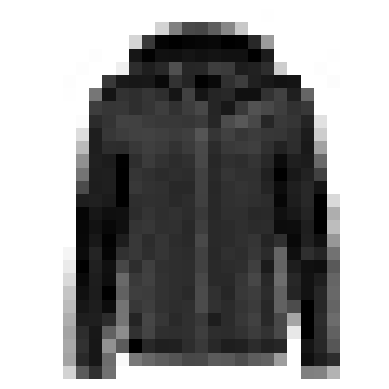

In [5]:
# Converter o tipo de dados para float  (0..1) e dividir o conjunto de dados entre treinaemnto e validação.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


In [6]:
# os rótulos são inteiros de 0 a 9.
# para exibir os nomes, é possível criar um dicionário

class_names = ["Camisete", "Calça", "Moleton", "Vestido", "Casaco",
               "Sandália", "Camisa", "tênis", "Bolsa", "Botina"]

class_names[y_train[0]]

'Casaco'

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.layers

/home/fernando/Área de trabalho/Dev/Machine-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-01 21:10:57.844665: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [8]:
# Definir a função de perda e o otimizador
# sparse_categorical_crossentropy -> rótulos esparsos (para cada instância, existe somente um índice de classe)
# categorical_crossentropy -> probabilidade-alvo por classe (vetores one-hot [0,0,1,0])
# binary_crossentropy -> classificador binário (com função de ativação sigmoid)
# m ais info em keras.io/optimizers, keras.io/metrics e keras.io/losses
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
# treinamento
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2025-07-01 21:10:58.783329: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6897 - loss: 0.9905 - val_accuracy: 0.8290 - val_loss: 0.5031
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8232 - loss: 0.5096 - val_accuracy: 0.8494 - val_loss: 0.4457
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8412 - loss: 0.4475 - val_accuracy: 0.8518 - val_loss: 0.4362
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8524 - loss: 0.4214 - val_accuracy: 0.8644 - val_loss: 0.3972
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8596 - loss: 0.3978 - val_accuracy: 0.8638 - val_loss: 0.3858
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8671 - loss: 0.3781 - val_accuracy: 0.8700 - val_loss: 0.3737
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8731 - loss: 0.3603 - val_accuracy: 0.8674 - val_loss: 0.3665
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8738 - loss: 0.3531 - val

In [10]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


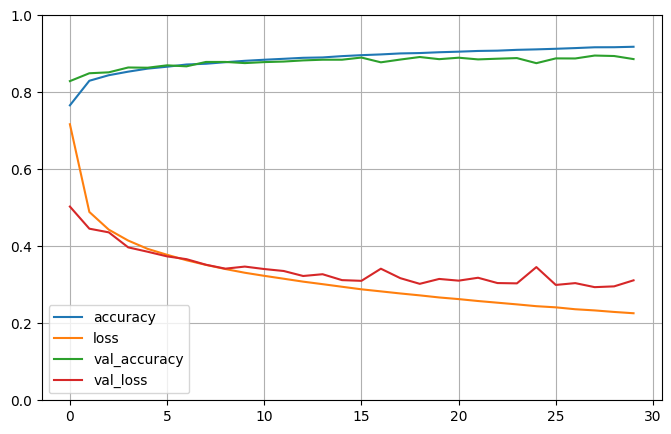

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

 26/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8888 - loss: 0.3099

2025-07-01 21:18:55.462271: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8775 - loss: 0.3496


[0.35316628217697144, 0.8741000294685364]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Botina


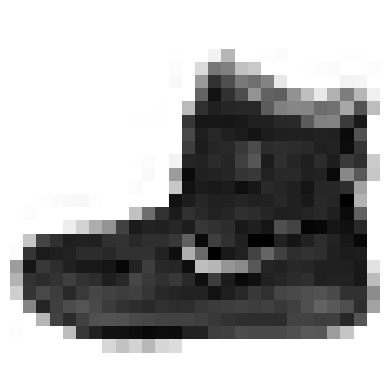

In [13]:
import numpy as np
y_proba = model.predict(np.expand_dims(X_valid[0], axis=0))
print(y_proba.round(2))
print(class_names[np.argmax(y_proba[0], axis=-1)])

plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.98]]
Botina


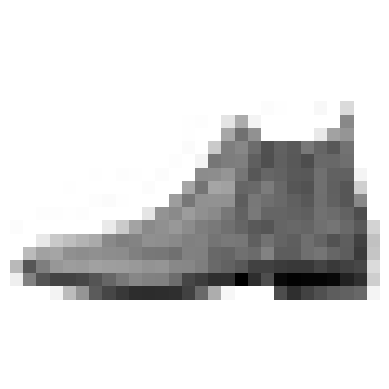

In [14]:
y_proba = model.predict(np.expand_dims(X_test[0], axis=0))
print(y_proba.round(2))
print(class_names[np.argmax(y_proba[0], axis=-1)])

plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

# CNN

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

/home/fernando/Área de trabalho/Dev/Machine-Learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10


2025-07-01 21:18:58.022191: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2025-07-01 21:19:04.023980: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18063360 exceeds 10% of free system memory.


   1/1719 ━━━━━━━━━━━━━━━━━━━━ 2:52:40 6s/step - accuracy: 0.0625 - loss: 2.3072

2025-07-01 21:19:04.666812: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18063360 exceeds 10% of free system memory.


 897/1719 ━━━━━━━━━━━━━━━━━━━━ 13:53 1s/step - accuracy: 0.5440 - loss: 1.2481

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
[[0.   0.   0.   0.   0.   0.03 0.   0.15 0.   0.82]]
Botina


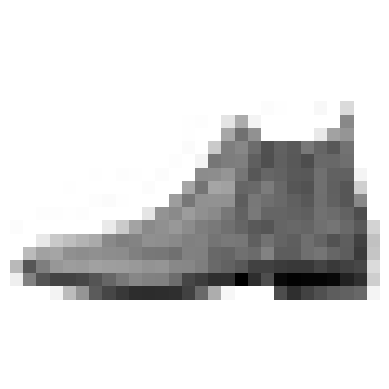

In [17]:
y_proba = model.predict(np.expand_dims(X_test[0], axis=0))
print(y_proba.round(2))
print(class_names[np.argmax(y_proba[0], axis=-1)])

plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[0.   0.   0.24 0.   0.56 0.   0.19 0.   0.   0.  ]]
Casaco


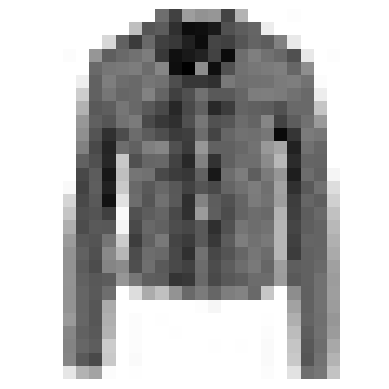

In [18]:
y_proba = model.predict(np.expand_dims(X_test[10], axis=0))
print(y_proba.round(2))
print(class_names[np.argmax(y_proba[0], axis=-1)])

plt.imshow(X_test[10], cmap="binary")
plt.axis('off')
plt.show()

# Modelos pré-treinados

In [19]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 109s 1us/step


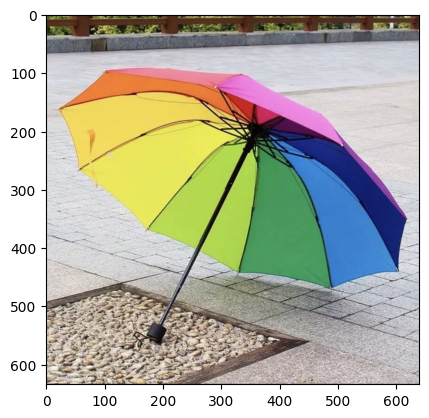

In [20]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = "https://acdn-us.mitiendanube.com/stores/001/907/662/products/img_7026-cbe447f521e2bcb70417466267491171-640-0.jpeg"
img = Image.open(requests.get(url, stream=True).raw)
#img.save("img.jpg")
#img.show()
plt.imshow(img)
plt.show()

#np.array([china, flower])

In [21]:
img_resized = tf.image.resize(img, [224, 224])

inputs = keras.applications.resnet50.preprocess_input(img_resized[np.newaxis, ...])
Y_proba = model.predict(inputs)
print(Y_proba.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
(1, 1000)


In [22]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=10)

for class_id, name, y_proba in top_K[0]:
  print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))


#for image_index in range(len(images)):
#    print("Image #{}".format(image_index))
#    for class_id, name, y_proba in top_K[image_index]:
#        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
 #   print()

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step 
  n04507155 - umbrella     99.98%
  n03792972 - mountain_tent 0.01%
  n03888257 - parachute    0.00%
  n09421951 - sandbar      0.00%
  n09428293 - seashore     0.00%
  n03944341 - pinwheel     0.00%
  n02981792 - catamaran    0.00%
  n03873416 - paddle       0.00%
  n02281406 - sulphur_butterfly 0.00%
  n02807133 - bathing_cap  0.00%


In [24]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

/home/fernando/Área de trabalho/Dev/Machine-Learning/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...:   0%|          | 0/1 [03:26<?, ? url/s]


KeyboardInterrupt: 

In [25]:
class_names = info.features["label"].names
print(class_names)

n_classes = info.features["label"].num_classes

dataset_size = info.splits["train"].num_examples
print(dataset_size)

NameError: name 'info' is not defined

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
#train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set_raw.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)